# Homework:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

In [1]:
"""
1) Evaluate derivative of cos(x) using forward difference scheme
\frac{d y(t)}{dt}_{fw} = \frac{y(t+h)-y(t)}{h}
"""
def forward_diff(x,y,dx):
    DyDx = (y*(x+dx) - y*(x))/dx
    return DyDx

In [2]:
import numpy as np

#Receive x value (x = pi/4)
x = np.pi/4
y = np.cos(x)
print("Cos(x) = ",y)

Cos(x) =  0.7071067811865476


Minimum error: 0.39456970173872496


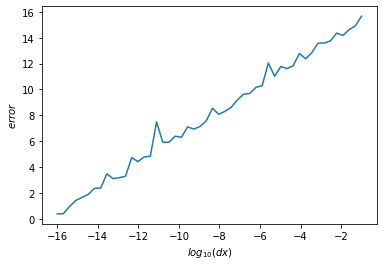

In [4]:
#Plot the error as log(Error) = 
#log_10(f'(numerically) - f'(analytic)) 
#against log_10(dx) for dx = 1e-16,1e-15,...0.1
import matplotlib.pyplot as plt

dx = 10**np.linspace(-16,-1)
error = np.log10(abs(forward_diff(x, y, dx) - np.sin(x)))

print("Minimum error:", min(abs(error)))

plt.plot(np.log10(dx),abs(error))
plt.xlabel("$log_{10}(dx)$")
plt.ylabel("$error$")
plt.show()

Clearly, the best value for $dx= 2^{-16}$ as it produces the lowest error rate.

In [5]:
"""
2) Repeat part 1 using the central difference scheme:
\frac{d y(t)}{dt}_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}
"""
import matplotlib.pyplot as plt
import numpy as np

def center_diff(x,y,dx):
    return (y*(x+dx/2) - y*(x-dx/2))/dx

Minimum error 0.15051499783199063


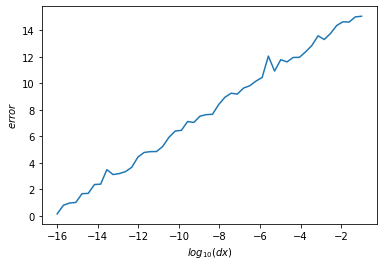

In [6]:
import matplotlib.pyplot as plt

dx = 10**np.linspace(-16,-1)
error = np.log10(abs(center_diff(x, y, dx) - np.sin(x)))

print("Minimum error", min(abs(error)))

plt.plot(np.log10(dx),abs(error))
plt.xlabel("$log_{10}(dx)$")
plt.ylabel("$error$")
plt.show()

Similar to the first part of the homework, the `center_diff` function has a minimum error at $dx = 2^{-16}$.

Additionally, the `center_diff` function clearly has less error than the `forward_diff` function. Thus, the `center_diff` function is better to use for differentiation.

In [7]:
"""
3) Repeat part 2) for x = 0
"""
#Receive x value
x = 0
y = np.cos(x)
print("Cos(x) = ",y)

Cos(x) =  1.0


Minimum error 0.0


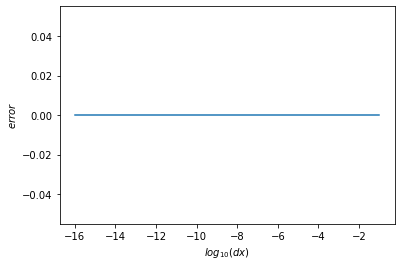

In [8]:
import matplotlib.pyplot as plt

dx = 10**np.linspace(-16,-1)
error = np.log10(abs(center_diff(x, y, dx) - np.sin(x)))

print("Minimum error", min(abs(error)))

plt.plot(np.log10(dx),abs(error))
plt.xlabel("$log_{10}(dx)$")
plt.ylabel("$error$")
plt.show()

Unlike part (2), we get an error of zero across the board; why is that? Well if $x = 0$, then the central difference method becomes:

$$
\frac{(y*(dx/2) - y(-dx/2))}{dx} = \frac{ydx}{dx} = y
$$

and since $x = 0$, $cos(0) = 1 = y$. The error is then calculated as 
$$
error = log_{10}|1 - sin(x)| = log_{10}|1| = 0
$$

Thus, our error calculation is always zero for this occasion (even if the result between our analytic and numerical calculations are $\mathit{completely}$ different).